#### Import des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors

#### Les fonctions

In [51]:
def make_grid(dim=100, p=0.4):    
    """Une simple fonction qui renvoie une matrice de taille dim x dim, 
    remplie de 1 pour les arbres et de 0 pour les espaces vides, 
    avec un probabilité p d'avoir des arbres"""    
    grid = np.random.choice([1.,0.],dim*dim,p=[p,1-p]).reshape((dim,dim))
    return grid
    
def start_fire(grid, n):
    """Fonction qui initie le feu à n endroits au hasard dans la forêt et renvoie 
    les coordonnées de ces foyers"""    
    c = np.argwhere(grid>0)
    index = np.random.choice(c.shape[0], n, replace=False)
    idx = c[index]    
    for i in idx:  
        grid[tuple(i)] = 0.5
    return idx

def unpad(grid):
    """Fonction qui permet d'enlever le pad d'épaisseur 1 rajouté à la matrice grid dans la fonction 
    propage()"""
    grid = grid[1:-1,1:-1]
    return grid

def propage(grid, f):
    """fonction qui simule la propagation du feu d'un tour à l'autre"""    
    #On pad de 1 pour ne pas s'enconbrer de conditions trop lourdes coucernant les points en dehors de la map
    grilles = grid
    feu = f 
       
    while len(feu) > 0:  
        pgrid = np.pad(grilles[:t_foret], 1, 'constant', constant_values=0)
        f = feu
        feu = []
        for element in f: 
            y = element[0]+1
            x = element[1]+1
            # Feu tour n-1 devient terre
            pgrid[tuple(element+1)] = 0 
            # Arbres proche du feu prennent feu
            if (0 < element[0] <= t_foret) and (0 < element[1] <= t_foret):
                if pgrid[y,x-1] == 1: 
                    pgrid[y,x-1] = 0.5
                    feu.append([y-1,x-2])
                if pgrid[y,x+1] == 1: 
                    pgrid[y,x+1] = 0.5
                    feu.append([y-1,x])
                if pgrid[y-1,x] == 1: 
                    pgrid[y-1,x] = 0.5
                    feu.append([y-2,x-1])
                if pgrid[y+1,x] == 1: 
                    pgrid[y+1,x] = 0.5
                    feu.append([y,x-1]) 
                    
            print(feu)
                    
        pgrid = unpad(pgrid)                    
        grilles = np.append(grille, pgrid, axis=0)
    return grille

#### L'animation

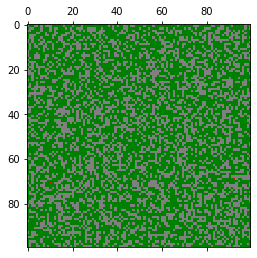

<Figure size 432x288 with 0 Axes>

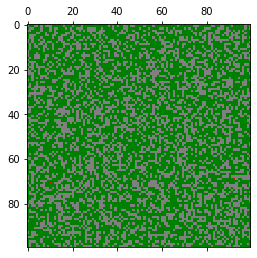

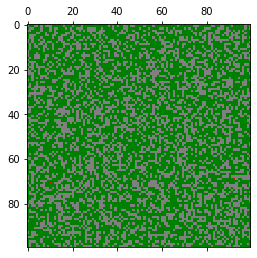

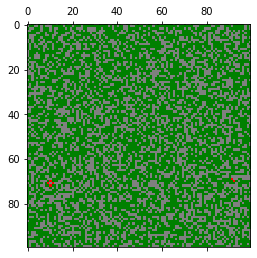

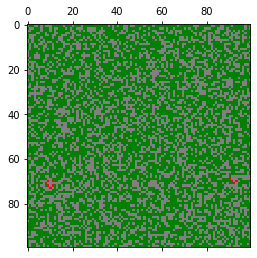

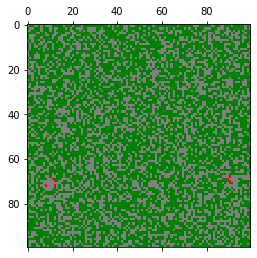

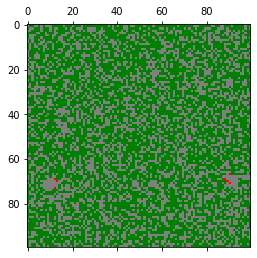

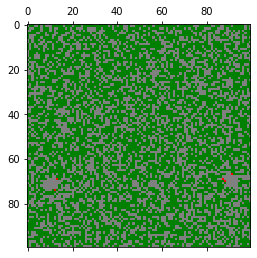

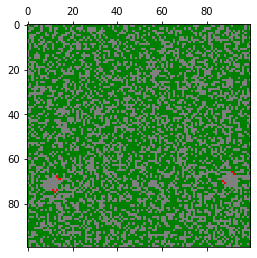

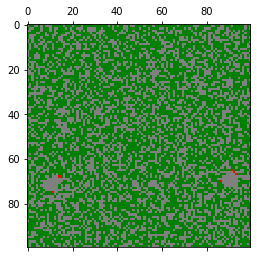

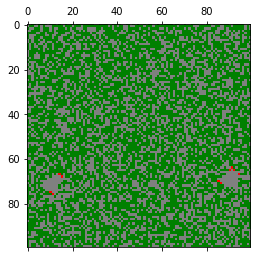

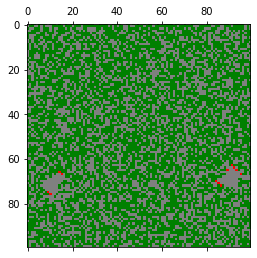

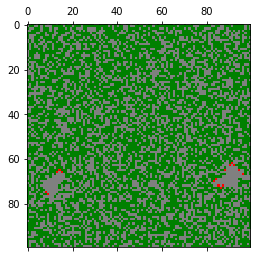

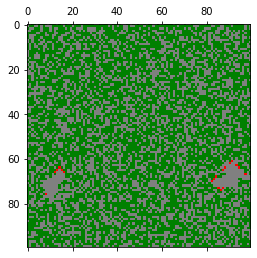

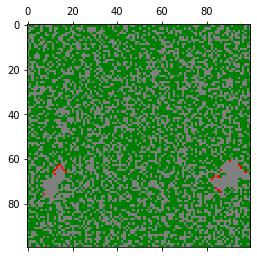

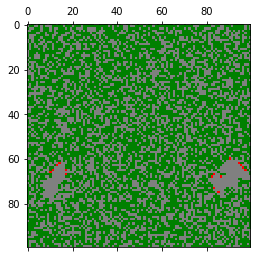

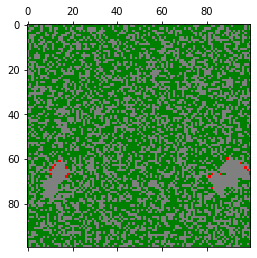

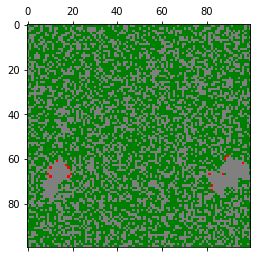

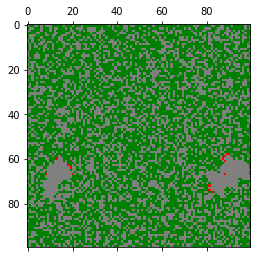

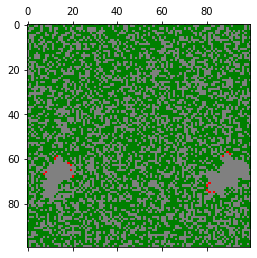

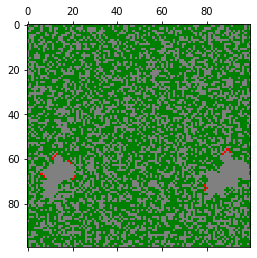

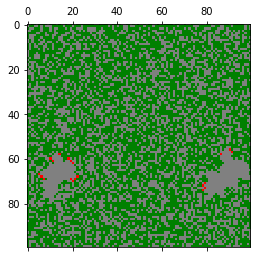

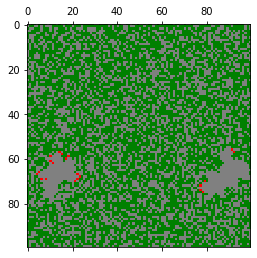

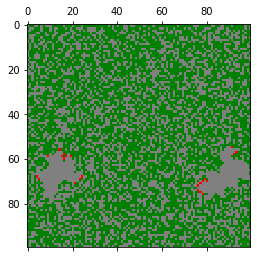

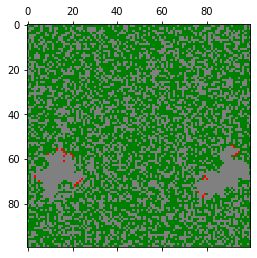

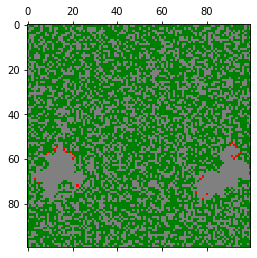

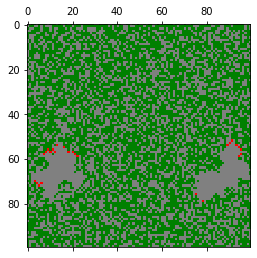

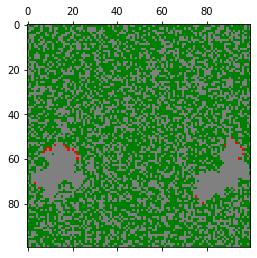

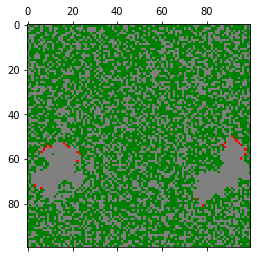

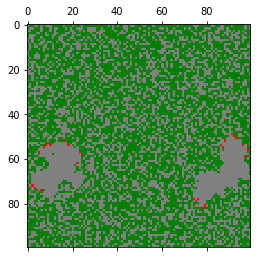

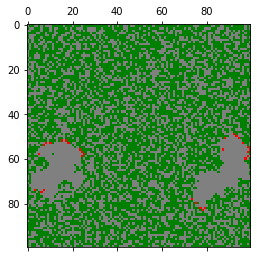

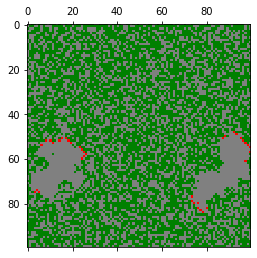

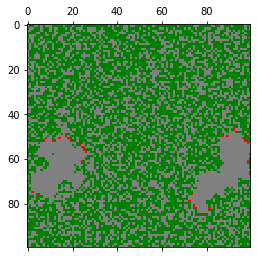

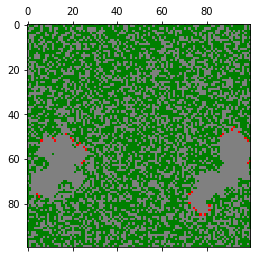

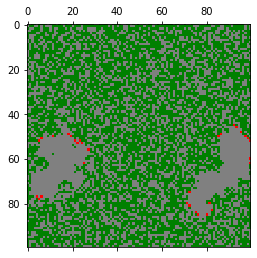

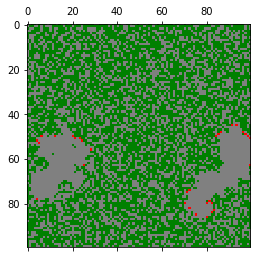

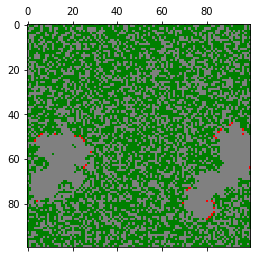

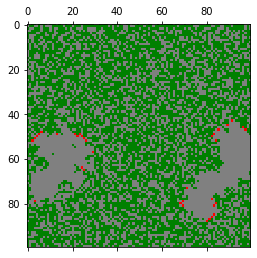

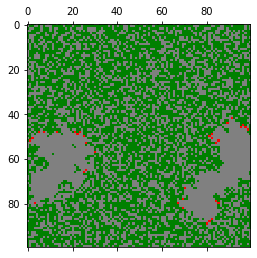

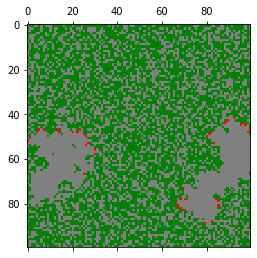

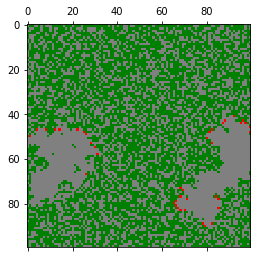

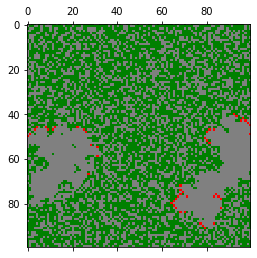

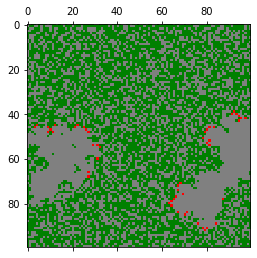

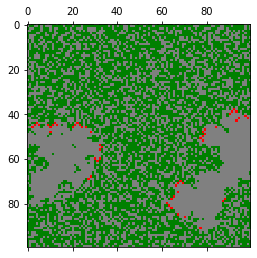

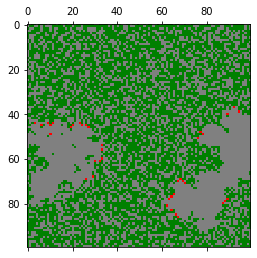

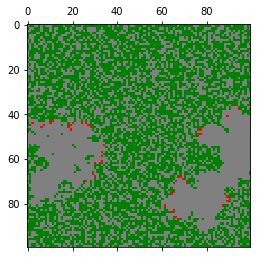

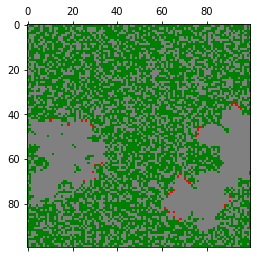

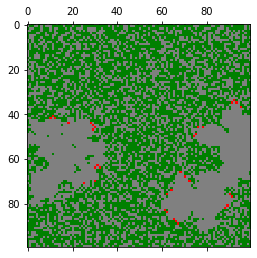

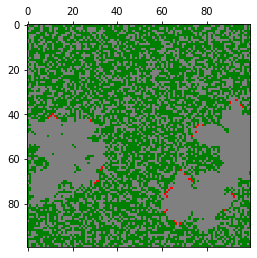

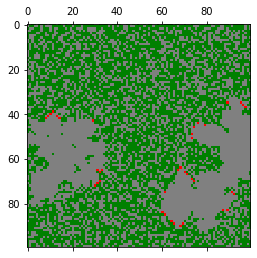

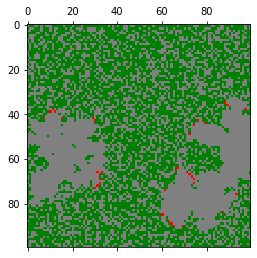

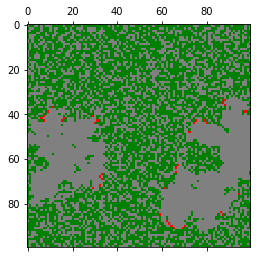

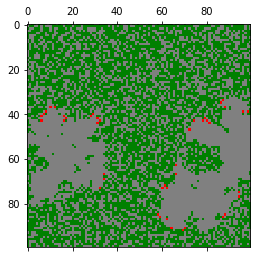

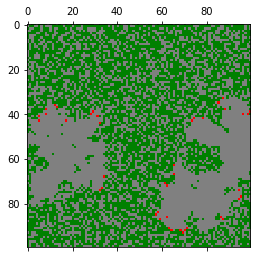

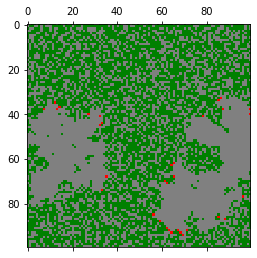

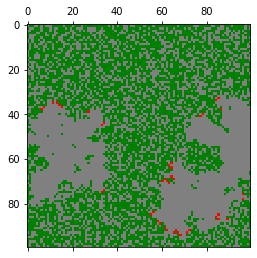

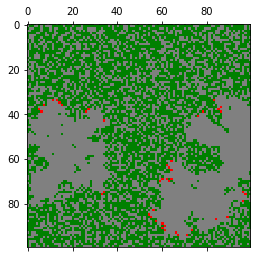

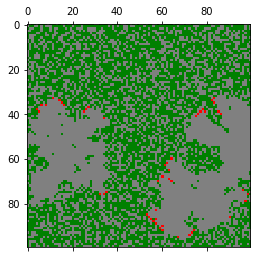

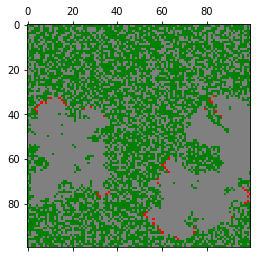

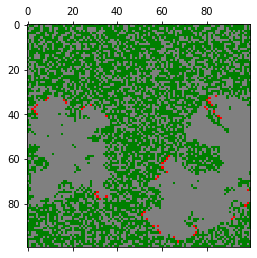

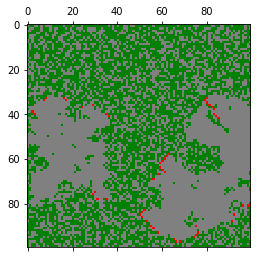

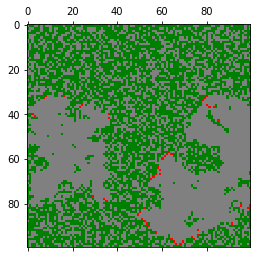

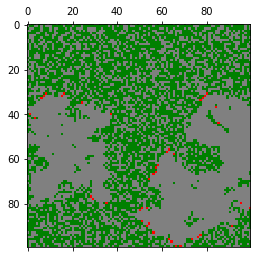

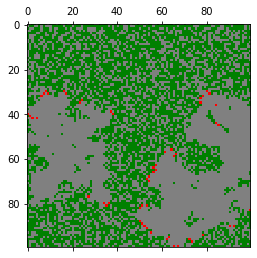

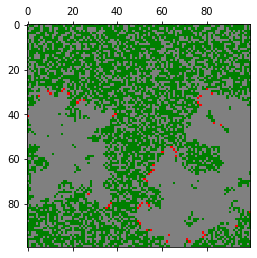

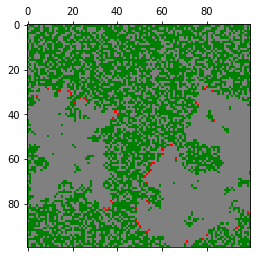

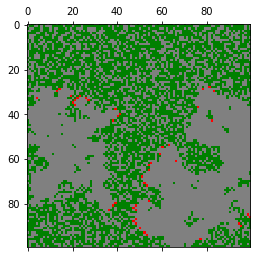

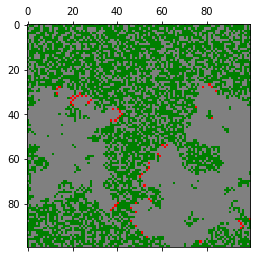

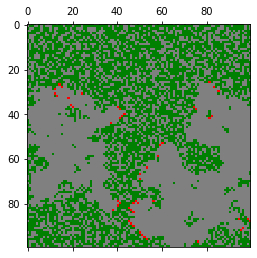

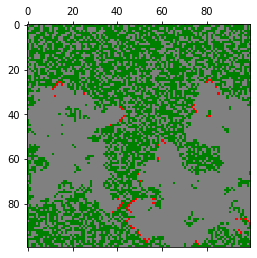

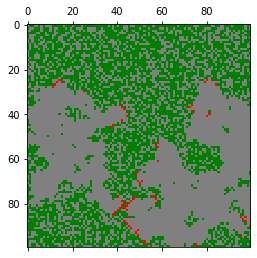

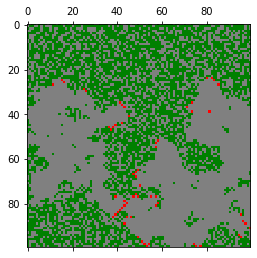

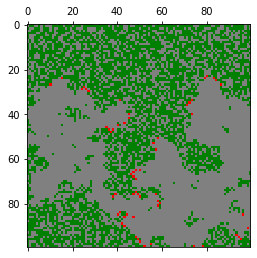

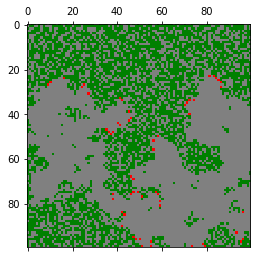

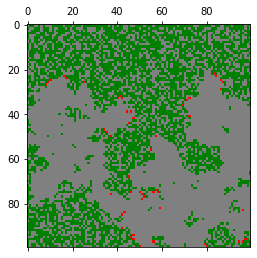

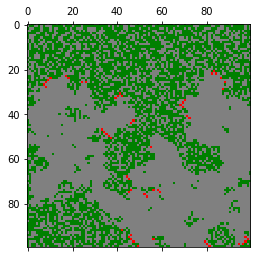

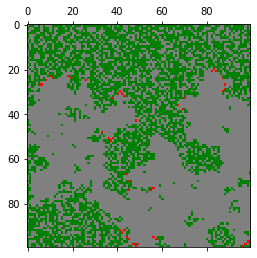

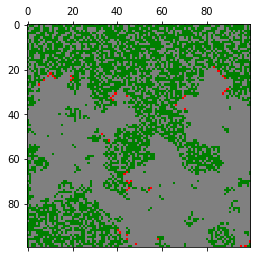

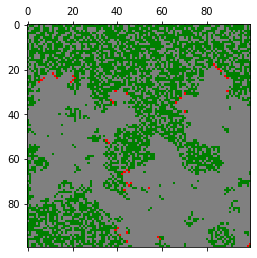

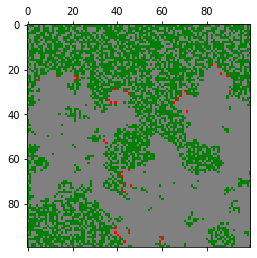

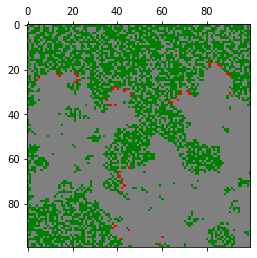

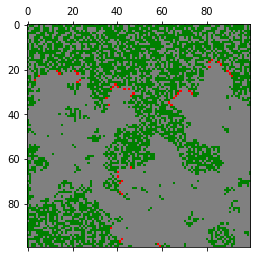

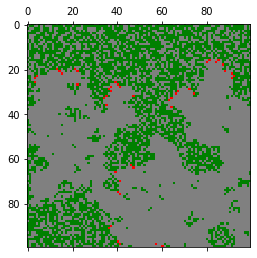

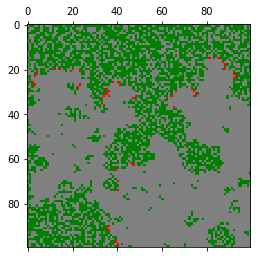

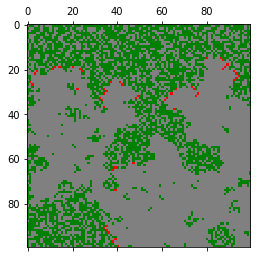

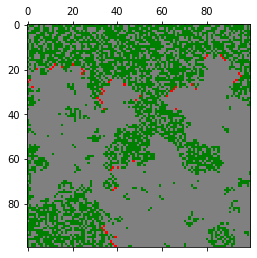

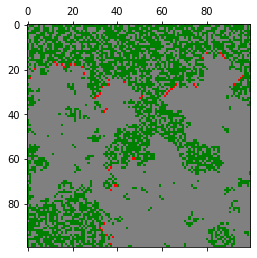

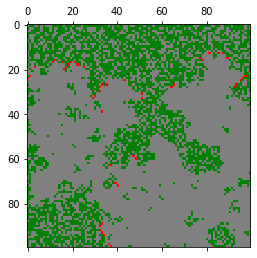

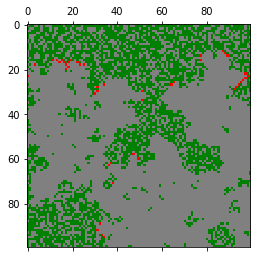

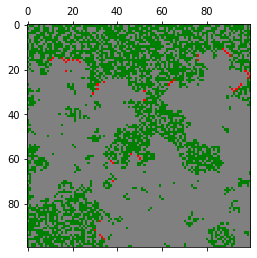

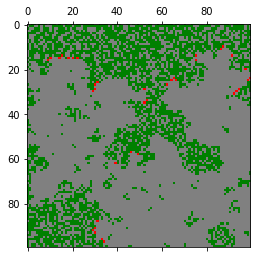

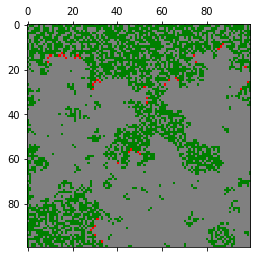

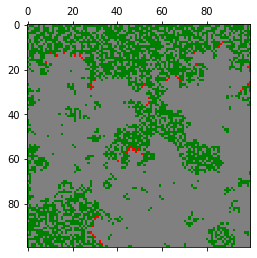

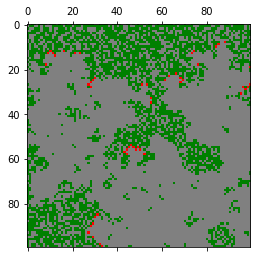

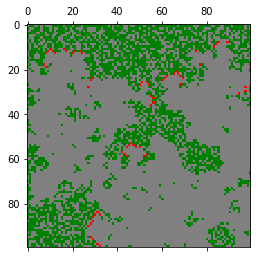

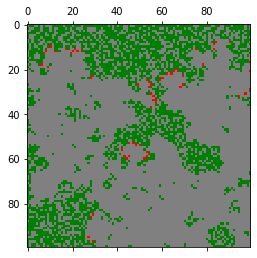

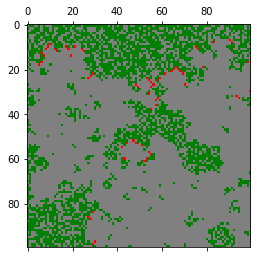

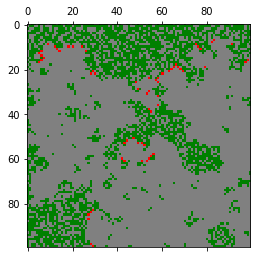

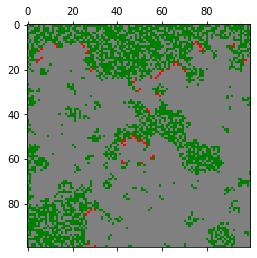

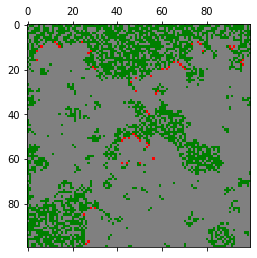

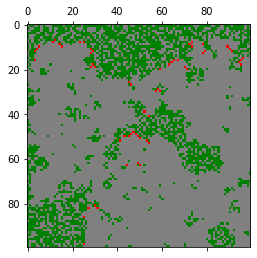

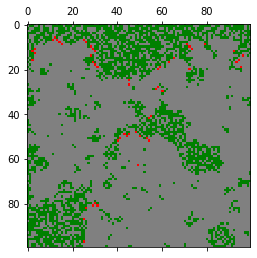

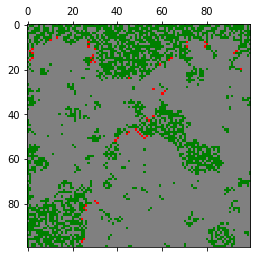

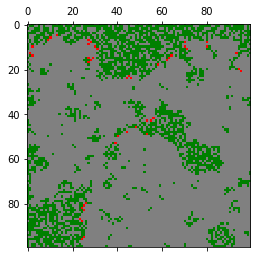

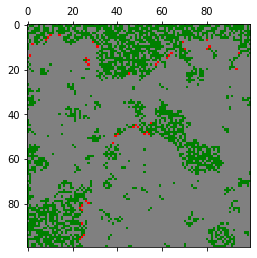

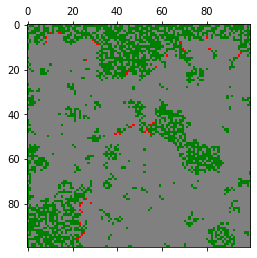

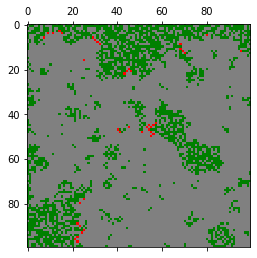

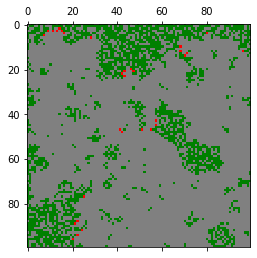

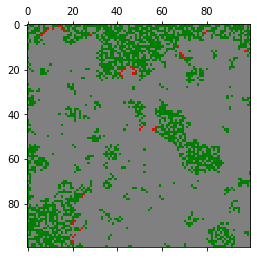

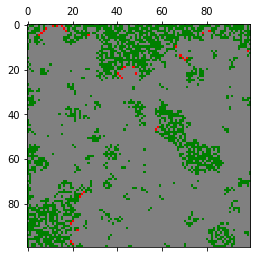

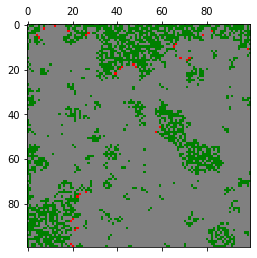

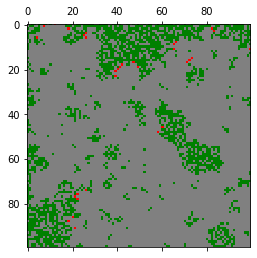

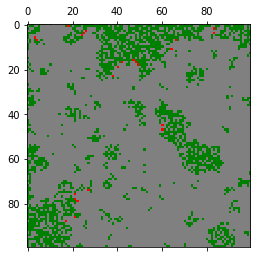

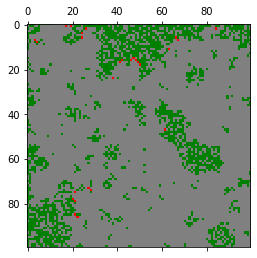

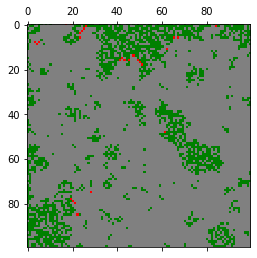

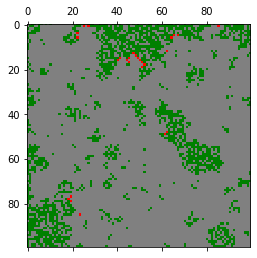

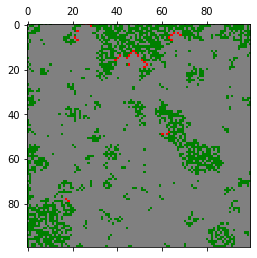

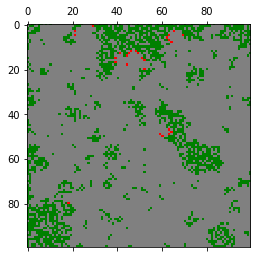

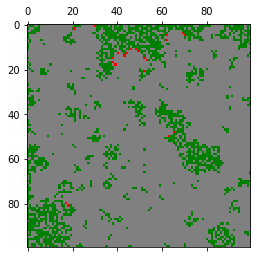

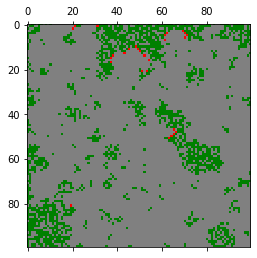

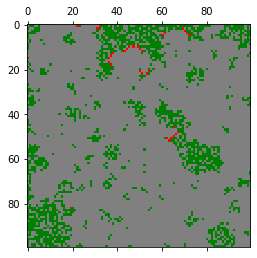

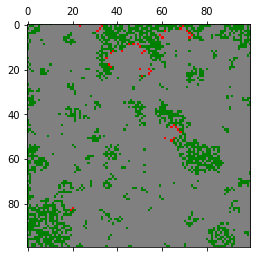

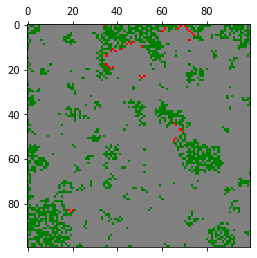

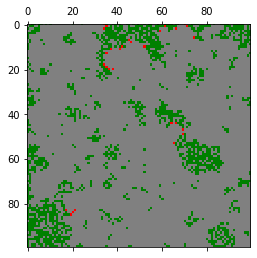

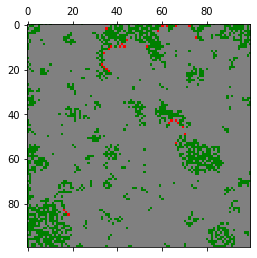

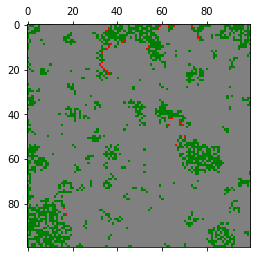

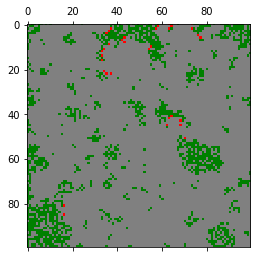

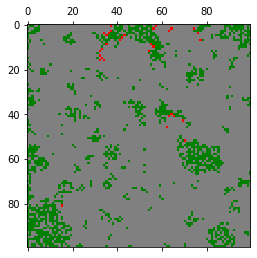

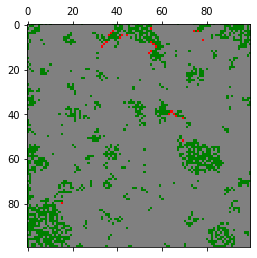

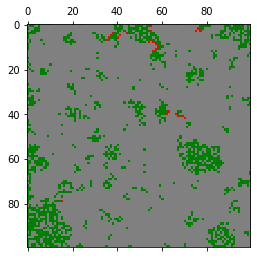

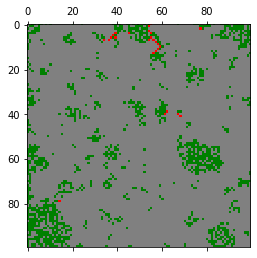

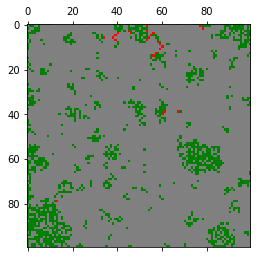

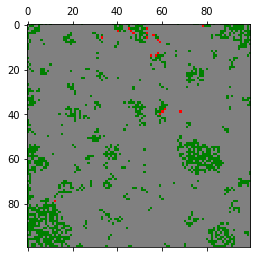

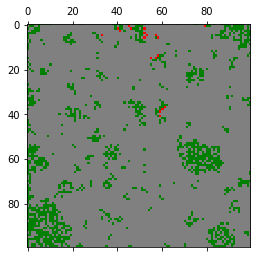

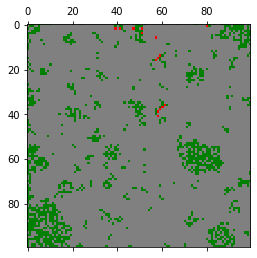

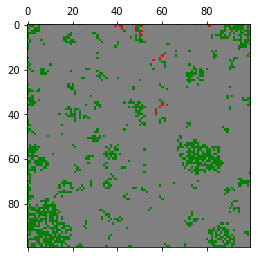

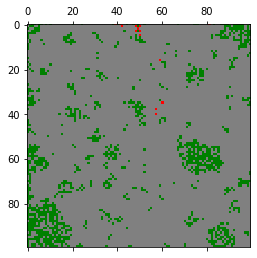

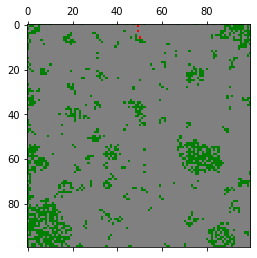

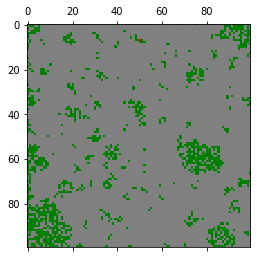

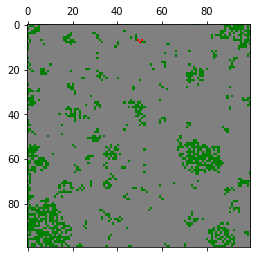

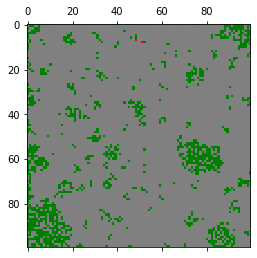

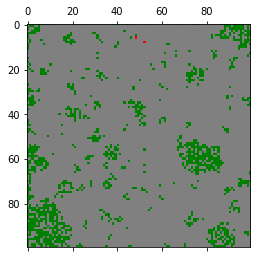

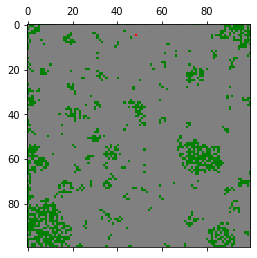

142
<class 'matplotlib.animation.FuncAnimation'>


Traceback (most recent call last):
  File "/home/younzer/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/younzer/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/home/younzer/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1522, in _init_draw
    for artist in f:
TypeError: 'AxesImage' object is not iterable


In [28]:
t_foret = 100
grid = make_grid(t_foret, 0.6)
feu = start_fire(grid, 2)
cmap = colors.ListedColormap(['gray','red', 'green']) 



# fig = plt.figure()
# im = plt.matshow(grid, cmap=cmap, animated=True)

# def init():
#     im.set_data(grid)

# def animate():
#     grid, feu = propage(grid, feu)
#     im.set_data(grid)
#     return im



ims = []
fig = plt.figure()
foret = plt.matshow(grid, cmap=cmap, animated=True)
ims.append(foret)
while len(feu) > 0:
    foret = plt.matshow(grid, cmap=cmap, animated=True)
    plt.show()
    ims.append([foret])
    grid, feu = propage(grid, feu)

print(len(ims))
# anim = animation.FuncAnimation(fig, animate, init_func=init)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
print(type(anim))
plt.show()
#anim.save('dynamic_images.mp4')

#### Analyse du seuil de percolation

In [4]:
plt.show()

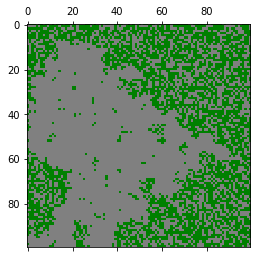

In [11]:
foret = plt.matshow(grid, cmap=cmap, animated=True)

In [31]:
grid = make_grid()

In [32]:
grid.shape

(100, 100)

In [33]:
grid

array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [38]:
grille = make_grid()
grosse = np.append(grid, grille, axis=0)
grosse.shape

(200, 100)

In [41]:
grosse[:100].shape

(100, 100)

In [43]:
grosse = np.append(grosse, grid, axis=0)
grosse[:100].shape

(100, 100)

In [44]:
grid[:100].shape

(100, 100)

In [52]:
t_foret = 100
grid = make_grid(t_foret, 0.6)
feu = start_fire(grid, 2)
grille = propage(grid, feu)

[[92, 15], [91, 16]]
[[92, 15], [91, 16], [81, 31], [81, 33], [80, 32], [82, 32]]


TypeError: can only concatenate list (not "int") to list